# 4 cross-section extraction
## The justification of moving from 6D analysis to 2$\times$3D

In [1]:
import sys; sys.path.insert(0, '../../../'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
from Xsec_tools import *
%matplotlib inline

versions:
{   'Overlay': 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2',
    'beam off': 'prod_reco_optfilter_extbnb_v12_mcc8_dev',
    'beam on': 'prod_reco_optfilter_bnb_v12_unblind_mcc8',
    'data date': '2018_08_16',
    'overlay date': '2018_09_22'}
OffBeam_scaling: 0.706302660161 = N(on beam)/N(off beam) before SwT
f(POT): 0.051017899728 = N(POT on beam)/N(POT MC)


In [5]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/AN-XsecCCQE/Figures/overlay_8.11/Xsec_extraction/'

In [3]:
versions['overlay date'] = '2018_09_22'
versions['Overlay'] = 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2'
versions['data date'] = '2018_08_16'
versions['beam on'] = 'prod_reco_optfilter_bnb_v12_unblind_mcc8'
versions['beam off'] = 'prod_reco_optfilter_extbnb_v12_mcc8_dev'
selected_overlay,selected_overlay_concat,selected_CC1p,genie_CC1p,selected_beam_on,selected_beam_off = load_mc_and_data()

found selected overlay files from , loading them...
9538 selected CC1p events overlay
found  462 selected on beam and 15 beam off events...
found selected genie CC1p...


In [13]:
gen_CC1p_mu_reco = genie_CC1p[genie_CC1p.Is_mu_TrackReconstructed==True]
gen_CC1p_p_reco = genie_CC1p[genie_CC1p.Is_p_TrackReconstructed==True]
gen_CC1p_mu_p_reco = genie_CC1p[ (genie_CC1p.Is_mu_TrackReconstructed==True) & (genie_CC1p.Is_p_TrackReconstructed==True) ]

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in divide
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in divide


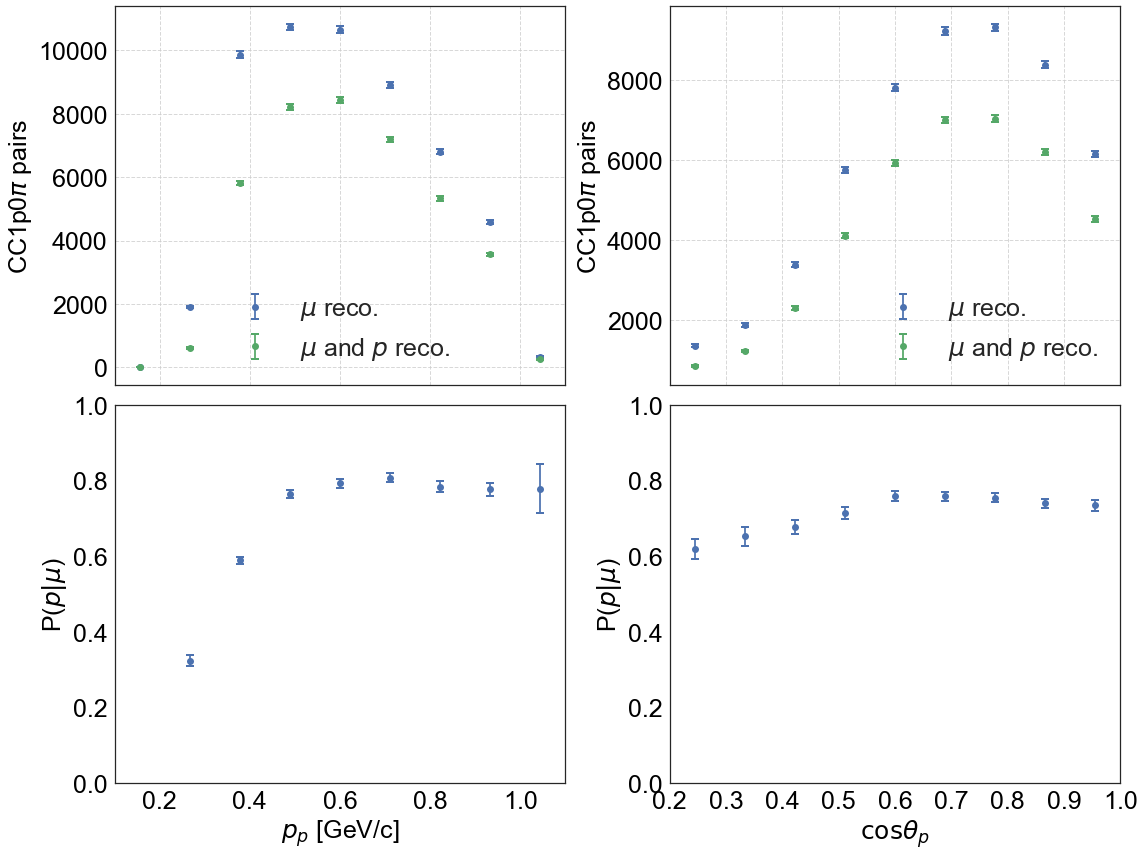

In [42]:
fig=plt.figure(figsize=(16,12))

for ivar,(var,bins,x_label) in enumerate(zip(['truth_Pp','truth_Pp_cos_theta'],
                                           [linspace(0.1,1.1,10),linspace(0.2,1,10)],
                                           [r'$p_{p}$ [GeV/c]',r'$\cos\theta_p$'])):

    mid = 0.5*(bins[1:] + bins[:-1])
    h = dict()

    ax = fig.add_subplot(2,2,1+ivar)
    for sam,slabel in zip([gen_CC1p_mu_reco,gen_CC1p_mu_p_reco],[r'$\mu$ reco.',r'$\mu$ and $p$ reco.']):
        h[slabel],_ = np.histogram(sam[var],bins=bins)
        h[slabel+' err'] = np.sqrt(h[slabel])
        ax.errorbar(x=mid,y=h[slabel],yerr=h[slabel+' err'],fmt='o',capthick=2,capsize=4,label=slabel)
    set_axes(ax,'',r'CC1p0$\pi$ pairs',do_add_grid=True,do_add_legend=True,remove_ticks_x=True,xlim=(np.min(bins),np.max(bins)))

    ax = fig.add_subplot(2,2,3+ivar)
    num,den = h[r'$\mu$ and $p$ reco.'],h[r'$\mu$ reco.']
    num_err,den_err = h[r'$\mu$ and $p$ reco. err'],h[r'$\mu$ reco. err']
    r = num.astype(np.float)/den
    rerr = r * np.sqrt( np.square(num_err/num) + np.square(den_err/den) )
    ax.errorbar(x=mid,y=r,yerr=rerr,fmt='o',capthick=2,capsize=4)    
    set_axes(ax,x_label,r'P($p|\mu$)',ylim=(0,1),xlim=(np.min(bins),np.max(bins)))

plt.tight_layout()

In [ ]:
fig=plt.figure(figsize=(16,12))
varx,vary = 'truth_Pp','truth_Pp_cos_theta'

for ivar,(,bins,x_label) in enumerate(zip([],
                                           [linspace(0.1,1.1,10),linspace(0.2,1,10)],
                                           [r'$p_{p}$ [GeV/c]',r'$\cos\theta_p$'])):

    mid = 0.5*(bins[1:] + bins[:-1])
    h = dict()

    ax = fig.add_subplot(2,2,1+ivar)
    for sam,slabel in zip([gen_CC1p_mu_reco,gen_CC1p_mu_p_reco],[r'$\mu$ reco.',r'$\mu$ and $p$ reco.']):
        h[slabel],_,_ = np.histogram2d(sam[var],bins=bins)
        h[slabel+' err'] = np.sqrt(h[slabel])
        ax.errorbar(x=mid,y=h[slabel],yerr=h[slabel+' err'],fmt='o',capthick=2,capsize=4,label=slabel)
    set_axes(ax,'',r'CC1p0$\pi$ pairs',do_add_grid=True,do_add_legend=True,remove_ticks_x=True,xlim=(np.min(bins),np.max(bins)))

    ax = fig.add_subplot(2,2,3+ivar)
    num,den = h[r'$\mu$ and $p$ reco.'],h[r'$\mu$ reco.']
    num_err,den_err = h[r'$\mu$ and $p$ reco. err'],h[r'$\mu$ reco. err']
    r = num.astype(np.float)/den
    rerr = r * np.sqrt( np.square(num_err/num) + np.square(den_err/den) )
    ax.errorbar(x=mid,y=r,yerr=rerr,fmt='o',capthick=2,capsize=4)    
    set_axes(ax,x_label,r'P($p|\mu$)',ylim=(0,1),xlim=(np.min(bins),np.max(bins)))

plt.tight_layout()

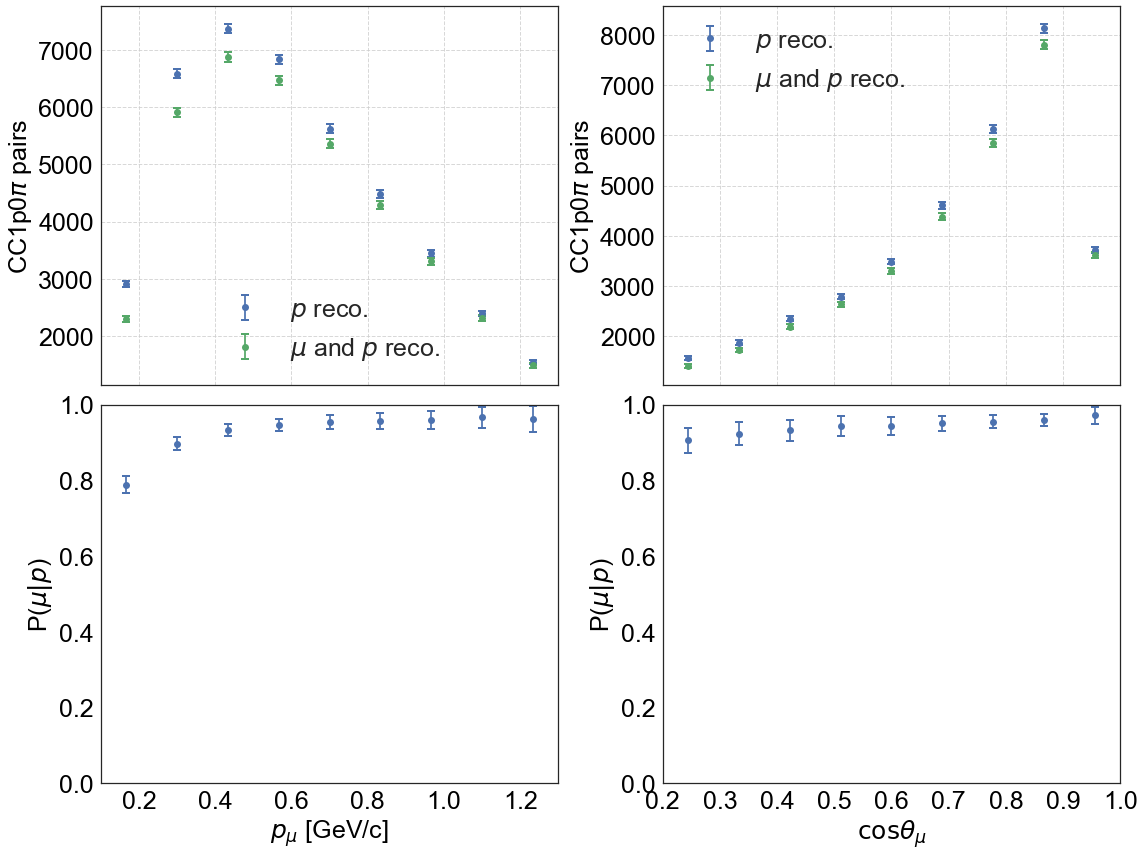

In [43]:
fig=plt.figure(figsize=(16,12))

for ivar,(var,bins,x_label) in enumerate(zip(['truth_Pmu','truth_Pmu_cos_theta'],
                                           [linspace(0.1,1.3,10),linspace(0.2,1,10)],
                                           [r'$p_{\mu}$ [GeV/c]',r'$\cos\theta_\mu$'])):

    mid = 0.5*(bins[1:] + bins[:-1])
    h = dict()

    ax = fig.add_subplot(2,2,1+ivar)
    for sam,slabel in zip([gen_CC1p_p_reco,gen_CC1p_mu_p_reco],[r'$p$ reco.',r'$\mu$ and $p$ reco.']):
        h[slabel],_ = np.histogram(sam[var],bins=bins)
        h[slabel+' err'] = np.sqrt(h[slabel])
        ax.errorbar(x=mid,y=h[slabel],yerr=h[slabel+' err'],fmt='o',capthick=2,capsize=4,label=slabel)
    set_axes(ax,'',r'CC1p0$\pi$ pairs',do_add_grid=True,do_add_legend=True,remove_ticks_x=True,xlim=(np.min(bins),np.max(bins)))

    ax = fig.add_subplot(2,2,3+ivar)
    num,den = h[r'$\mu$ and $p$ reco.'],h[r'$p$ reco.']
    num_err,den_err = h[r'$\mu$ and $p$ reco. err'],h[r'$p$ reco. err']
    r = num.astype(np.float)/den
    rerr = r * np.sqrt( np.square(num_err/num) + np.square(den_err/den) )
    ax.errorbar(x=mid,y=r,yerr=rerr,fmt='o',capthick=2,capsize=4)    
    set_axes(ax,x_label,r'P($\mu|p$)',ylim=(0,1),xlim=(np.min(bins),np.max(bins)))

plt.tight_layout()

# What is the acceptance as a function of $p_p$ and $\theta_p$ in different bins of $p_\mu$ and $\theta_\mu$

In [4]:
def sample_in_xy_bin(sample,xmin,xmax,ymin,ymax,xvar,yvar):
    return sample[(xmin<sample[xvar])
                  &(sample[xvar]<xmax)
                  &(ymin<sample[yvar])
                  &(sample[yvar]<ymax)]

def sample_in_muon_bin(sample,Pmu_min,Pmu_max,Pmu_cos_theta_min,Pmu_cos_theta_max):
    return sample_in_xy_bin(sample,Pmu_min,Pmu_max,Pmu_cos_theta_min,Pmu_cos_theta_max,xvar='truth_Pmu',yvar='truth_Pmu_cos_theta')
def sample_in_proton_bin(sample,Pp_min,Pp_max,Pp_cos_theta_min,Pp_cos_theta_max):
    return sample_in_xy_bin(sample,Pp_min,Pp_max,Pp_cos_theta_min,Pp_cos_theta_max,xvar='truth_Pp',yvar='truth_Pp_cos_theta')

## proton efficiency in muon bins

In [6]:
large_bins_Pmu_min = np.array([0,0.45])
large_bins_Pmu_cos_theta_min = np.array([-0.2,0.5])

In [8]:
Pp_bins = linspace(0.3,1.,10); 
Pp_cos_theta_bins = linspace(0.2,1,10);

In [9]:
large_bins_Pmu_max = np.array([large_bins_Pmu_min[1],2])
large_bins_Pmu_centers = 0.5*(large_bins_Pmu_min+large_bins_Pmu_max)
large_bins_Pmu_cos_theta_max = np.array([large_bins_Pmu_cos_theta_min[1],1])
large_bins_Pmu_cos_theta_centers = 0.5*(large_bins_Pmu_cos_theta_min+large_bins_Pmu_cos_theta_max)
hCC1p_muon_bins = np.zeros((2,2))

mid_Pp = 0.5*(Pp_bins[1:]+Pp_bins[:-1]); bin_width_Pp=(mid_Pp[1]-mid_Pp[0])
mid_Pp_cos_theta = 0.5*(Pp_cos_theta_bins[1:]+Pp_cos_theta_bins[:-1]); bin_width_Pp_cos_theta=(mid_Pp_cos_theta[1]-mid_Pp_cos_theta[0])

done.


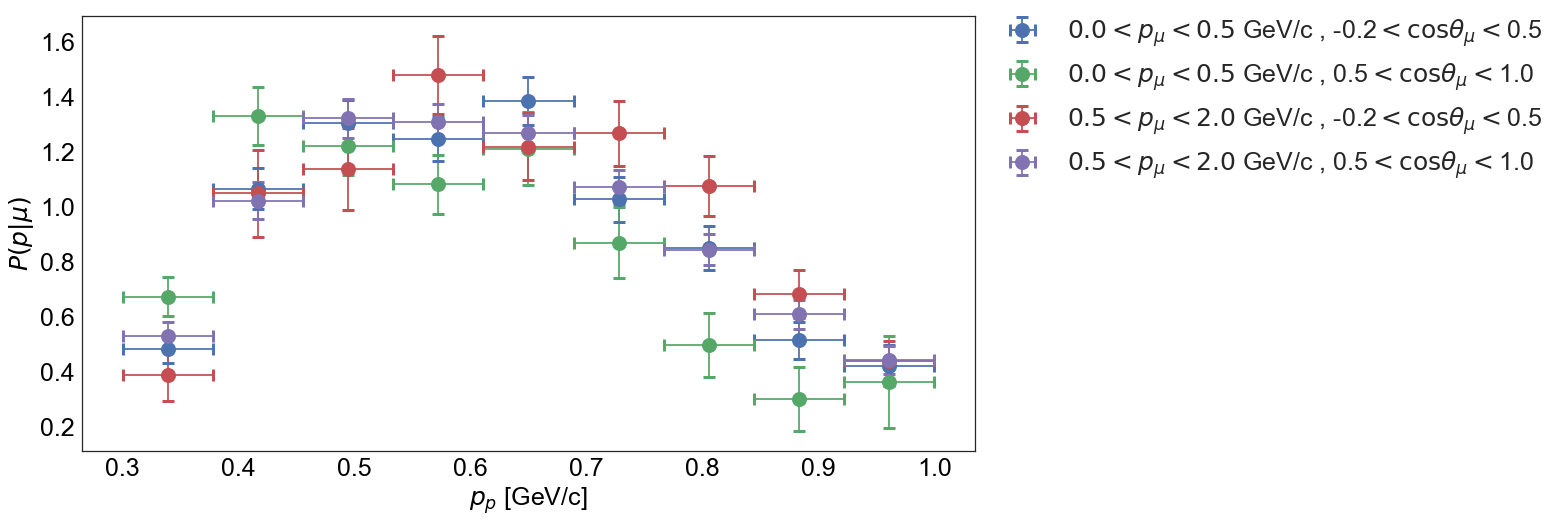

In [11]:
heff,heff_err = dict(), dict()
for iPmu,(Pmu_min,Pmu_max) in enumerate(zip(large_bins_Pmu_min,large_bins_Pmu_max)):
    for iPmu_cos_theta,(Pmu_cos_theta_min,Pmu_cos_theta_max) in enumerate(zip(large_bins_Pmu_cos_theta_min,large_bins_Pmu_cos_theta_max)):
        key = '%d %d'%(iPmu,iPmu_cos_theta)

        genie_CC1p_muon_bin = sample_in_muon_bin(genie_CC1p,Pmu_min,Pmu_max,Pmu_cos_theta_min,Pmu_cos_theta_max)        
        gen_muon_bin = sample_in_limits(sam=genie_CC1p_muon_bin
                                 ,varPmu='truth_Pmu',varPmu_cos_theta='truth_Pmu_cos_theta'                                 
                                 ,varPp='truth_Pp',varPp_cos_theta='truth_Pp_cos_theta')
        gen_muon_bin_no_ctu_bin = gen_muon_bin[gen_muon_bin['truth_Pmu_cos_theta']<Bins['cos(theta(mu))'][-2]]
        
        selected_CC1p_muon_bin = sample_in_muon_bin(selected_CC1p,Pmu_min,Pmu_max,Pmu_cos_theta_min,Pmu_cos_theta_max)
        sel_muon_bin = sample_in_limits(sam=selected_CC1p_muon_bin
                                 ,varPmu='truth_Pmu',varPmu_cos_theta='truth_Pmu_cos_theta'                                 
                                 ,varPp='truth_Pp',varPp_cos_theta='truth_Pp_cos_theta')
        sel_muon_bin_no_ctu_bin = sel_muon_bin[sel_muon_bin['truth_Pmu_cos_theta']<Bins['cos(theta(mu))'][-2]]

        effCC1p_muon_bin = float(len(sel_muon_bin_no_ctu_bin))/len(gen_muon_bin_no_ctu_bin)
        
        heff[key],heff_err[key] = [],[]
        for iPp in range(len(Pp_bins)-1):
            Pp_min,Pp_max = Pp_bins[iPp],Pp_bins[iPp+1]    
            
            gen_proton_bin = sample_in_proton_bin(gen_muon_bin_no_ctu_bin,Pp_min,Pp_max,-1,1)            
            Ngen = float(len(gen_proton_bin))

            acc_proton_bin = sample_in_proton_bin(sel_muon_bin_no_ctu_bin,Pp_min,Pp_max,-1,1)
            Nacc = float(len(acc_proton_bin))
            
            heff[key].append( (Nacc/Ngen if Ngen>0 else 0) * (1./effCC1p_muon_bin) )
            heff_err[key].append( heff[key][-1]*np.sqrt( (1./Nacc if Nacc>0 else 0) + (1./Ngen if Ngen>0 else 0)) )
print 'done.'

fig,ax=plt.subplots(figsize=(16,8))
for iPmu,(Pmu_min,Pmu_max) in enumerate(zip(large_bins_Pmu_min,large_bins_Pmu_max)):
    for iPmu_cos_theta,(Pmu_cos_theta_min,Pmu_cos_theta_max) in enumerate(zip(large_bins_Pmu_cos_theta_min,large_bins_Pmu_cos_theta_max)):
        key = '%d %d'%(iPmu,iPmu_cos_theta)
        ax.errorbar(x=mid_Pp,xerr=0.5*bin_width_Pp,y=heff[key],yerr=heff_err[key]
                    ,fmt='o',markersize=15,capsize=6,capthick=3
                    ,label=r'$%.1f<p_\mu<%.1f$ GeV/c , %s$<\cos\theta_\mu<$%s'%(Pmu_min,Pmu_max,Pmu_cos_theta_min,Pmu_cos_theta_max))        
set_axes(ax,r'$p_p$ [GeV/c]',r'$P(p | \mu)$')
ax.legend(bbox_to_anchor=(1,1.05),loc=2,fontsize=25)
plt.savefig(figures_path+'Pp_efficiency_in_muon_bins.pdf',bbox_inches='tight')

done.


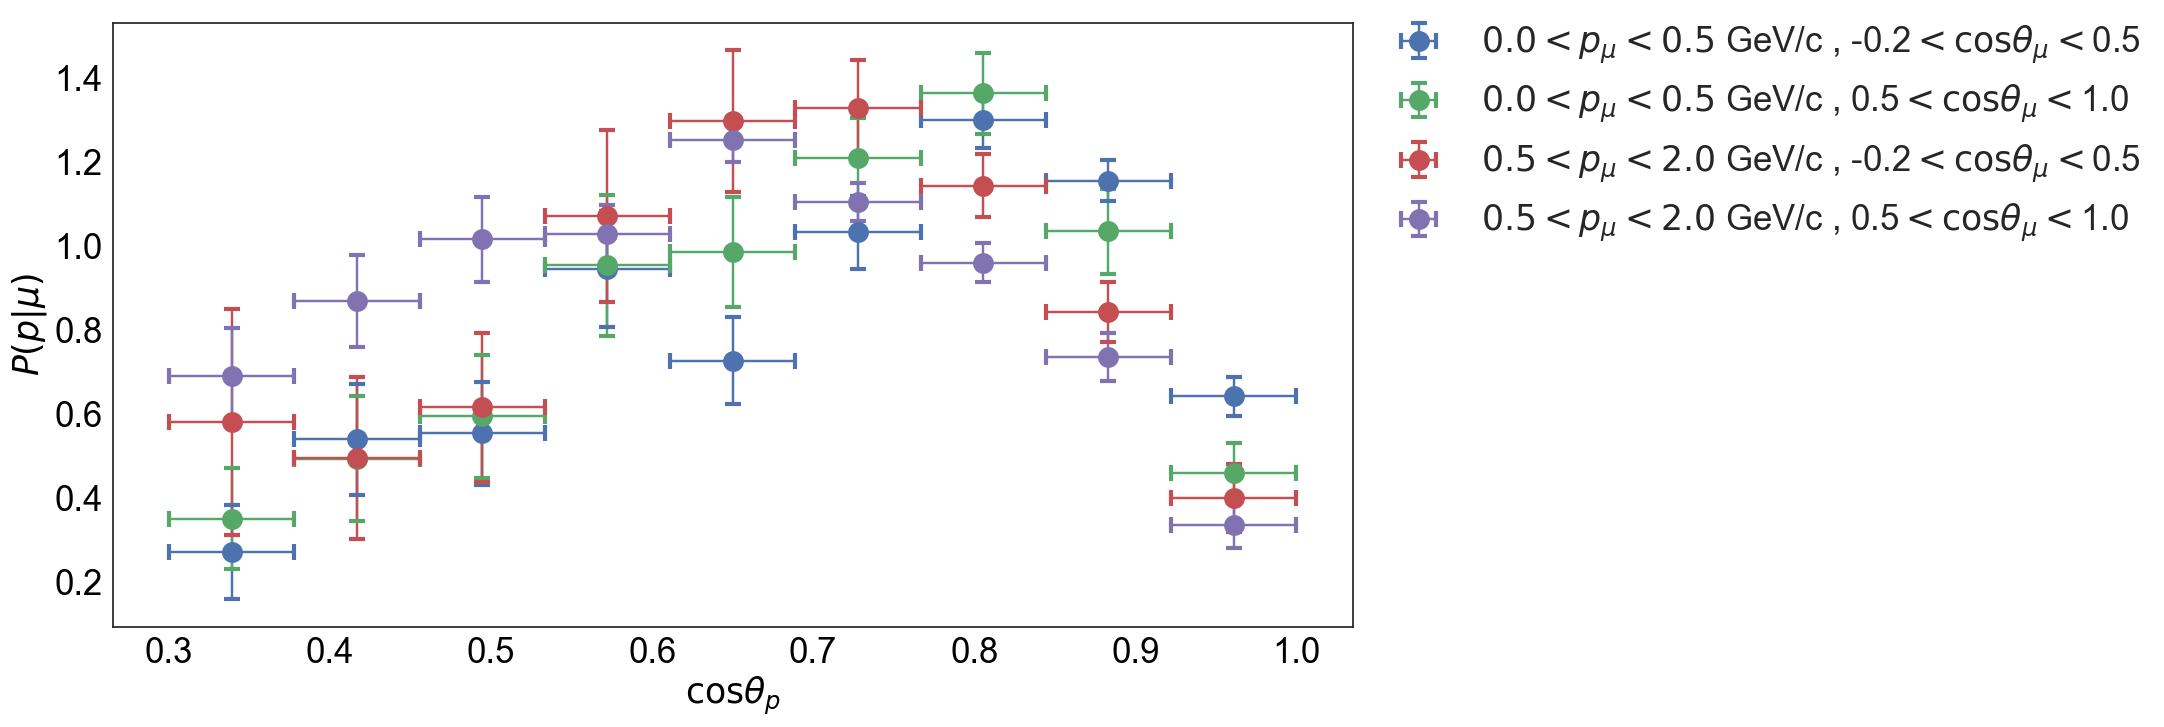

In [128]:
heff,heff_err = dict(), dict()
for iPmu,(Pmu_min,Pmu_max) in enumerate(zip(large_bins_Pmu_min,large_bins_Pmu_max)):
    for iPmu_cos_theta,(Pmu_cos_theta_min,Pmu_cos_theta_max) in enumerate(zip(large_bins_Pmu_cos_theta_min,large_bins_Pmu_cos_theta_max)):
        key = '%d %d'%(iPmu,iPmu_cos_theta)
        genie_CC1p_muon_bin = sample_in_muon_bin(genie_CC1p,Pmu_min,Pmu_max,Pmu_cos_theta_min,Pmu_cos_theta_max)        
        gen_muon_bin = sample_in_limits(sam=genie_CC1p_muon_bin
                                 ,varPmu='truth_Pmu',varPmu_cos_theta='truth_Pmu_cos_theta'                                 
                                 ,varPp='truth_Pp',varPp_cos_theta='truth_Pp_cos_theta')
        gen_muon_bin = gen_muon_bin[gen_muon_bin['truth_Pmu_cos_theta']<Bins['cos(theta(mu))'][-2]]
        
        selected_CC1p_muon_bin = sample_in_muon_bin(selected_CC1p,Pmu_min,Pmu_max,Pmu_cos_theta_min,Pmu_cos_theta_max)
        sel_muon_bin = sample_in_limits(sam=selected_CC1p_muon_bin
                                 ,varPmu='truth_Pmu',varPmu_cos_theta='truth_Pmu_cos_theta'                                 
                                 ,varPp='truth_Pp',varPp_cos_theta='truth_Pp_cos_theta')
        sel_muon_bin = sel_muon_bin[sel_muon_bin['truth_Pmu_cos_theta']<Bins['cos(theta(mu))'][-2]]

        effCC1p_muon_bin = float(len(sel_muon_bin))/len(gen_muon_bin)



        heff[key],heff_err[key] = [],[]
        for iPp_cos_theta in range(len(Pp_cos_theta_bins)-1):
            Pp_cos_theta_min,Pp_cos_theta_max = Pp_cos_theta_bins[iPp_cos_theta],Pp_cos_theta_bins[iPp_cos_theta+1]    
            # efficiency
            gen_proton_bin = sample_in_proton_bin(gen_muon_bin,0,2,Pp_cos_theta_min,Pp_cos_theta_max)            
            acc_proton_bin = sample_in_proton_bin(sel_muon_bin,0,2,Pp_cos_theta_min,Pp_cos_theta_max)
            Ngen = float(len(gen_proton_bin))
            Nacc = float(len(acc_proton_bin))
            heff[key].append( (1./effCC1p_muon_bin)*Nacc/Ngen if Ngen>0 else 0 )
            heff_err[key].append( heff[key][-1]*np.sqrt( (1./Nacc if Nacc>0 else 0) 
                                                    + (1./Ngen if Ngen>0 else 0)) )        
print 'done.'

fig,ax=plt.subplots(figsize=(16,8))
for iPmu,(Pmu_min,Pmu_max) in enumerate(zip(large_bins_Pmu_min,large_bins_Pmu_max)):
    for iPmu_cos_theta,(Pmu_cos_theta_min,Pmu_cos_theta_max) in enumerate(zip(large_bins_Pmu_cos_theta_min,large_bins_Pmu_cos_theta_max)):
        key = '%d %d'%(iPmu,iPmu_cos_theta)
        ax.errorbar(x=mid_Pp,xerr=0.5*bin_width_Pp,y=heff[key],yerr=heff_err[key]
                    ,fmt='o',markersize=15,capsize=6,capthick=3
                    ,label=r'$%.1f<p_\mu<%.1f$ GeV/c , %s$<\cos\theta_\mu<$%s'%(Pmu_min,Pmu_max,Pmu_cos_theta_min,Pmu_cos_theta_max))        
set_axes(ax,r'$\cos\theta_p$',r'$P(p | \mu)$')
ax.legend(bbox_to_anchor=(1,1.05),loc=2,fontsize=25)
plt.savefig(figures_path+'Pp_cos_theta_efficiency_in_muon_bins.pdf',bbox_inches='tight')


# 2D efficiency

In [116]:
Pp_bins = linspace(0.3,1.,7); mid_Pp = 0.5*(Pp_bins[1:]+Pp_bins[:-1]); bin_width_Pp=(mid_Pp[1]-mid_Pp[0])
Pp_cos_theta_bins = linspace(0.2,1,7); mid_Pp_cos_theta = 0.5*(Pp_cos_theta_bins[1:]+Pp_cos_theta_bins[:-1]); bin_width_Pp_cos_theta=(mid_Pp_cos_theta[1]-mid_Pp_cos_theta[0])

heff,heff_err = dict(),  dict()
for iPmu,(Pmu_min,Pmu_max) in enumerate(zip(large_bins_Pmu_min,large_bins_Pmu_max)):
    for iPmu_cos_theta,(Pmu_cos_theta_min,Pmu_cos_theta_max) in enumerate(zip(large_bins_Pmu_cos_theta_min,large_bins_Pmu_cos_theta_max)):
        key = '%d %d'%(iPmu,iPmu_cos_theta)
        genie_CC1p_muon_bin = sample_in_muon_bin(genie_CC1p,Pmu_min,Pmu_max,Pmu_cos_theta_min,Pmu_cos_theta_max)        
        gen_muon_bin = sample_in_limits(sam=genie_CC1p_muon_bin
                                 ,varPmu='truth_Pmu',varPmu_cos_theta='truth_Pmu_cos_theta'                                 
                                 ,varPp='truth_Pp',varPp_cos_theta='truth_Pp_cos_theta')
        gen_muon_bin = gen_muon_bin[gen_muon_bin['truth_Pmu_cos_theta']<Bins['cos(theta(mu))'][-2]]
        
        selected_CC1p_muon_bin = sample_in_muon_bin(selected_CC1p,Pmu_min,Pmu_max,Pmu_cos_theta_min,Pmu_cos_theta_max)
        sel_muon_bin = sample_in_limits(sam=selected_CC1p_muon_bin
                                 ,varPmu='truth_Pmu',varPmu_cos_theta='truth_Pmu_cos_theta'                                 
                                 ,varPp='truth_Pp',varPp_cos_theta='truth_Pp_cos_theta')
        sel_muon_bin = sel_muon_bin[sel_muon_bin['truth_Pmu_cos_theta']<Bins['cos(theta(mu))'][-2]]

        effCC1p_muon_bin = float(len(sel_muon_bin))/len(gen_muon_bin)

        heff[key],heff_err[key] = ones(( len(Pp_bins)-1 , len(Pp_cos_theta_bins)-1 )), ones(( len(Pp_bins)-1 , len(Pp_cos_theta_bins)-1 ))
        for iPp in range(len(Pp_bins)-1):
            Pp_min,Pp_max = Pp_bins[iPp],Pp_bins[iPp+1]    
            for iPp_cos_theta in range(len(Pp_cos_theta_bins)-1):
                Pp_cos_theta_min,Pp_cos_theta_max = Pp_cos_theta_bins[iPp_cos_theta],Pp_cos_theta_bins[iPp_cos_theta+1]    
                # efficiency
                gen_proton_bin = sample_in_proton_bin(gen_muon_bin,Pp_min,Pp_max,Pp_cos_theta_min,Pp_cos_theta_max)            
                acc_proton_bin = sample_in_proton_bin(sel_muon_bin,Pp_min,Pp_max,Pp_cos_theta_min,Pp_cos_theta_max)
                Ngen = float(len(gen_proton_bin))
                Nacc = float(len(acc_proton_bin))
                heff[key][iPp][iPp_cos_theta] = ( (Nacc/Ngen if Ngen>0 else 0) ) * (1./effCC1p_muon_bin)
                heff_err[key][iPp][iPp_cos_theta] = (heff[key][iPp][iPp_cos_theta]*np.sqrt( (1./Nacc if Nacc>0 else 0) + (1./Ngen if Ngen>0 else 0)) )
print 'done computing efficiency.'

done computing efficiency.


In [120]:
# now ask, in each bin,
# what is the probability that 
# all of the efficiencies were sampled from the same number?
eff_arr = []; w_arr = []
chi2 = 0; ndf=-1;
chi2_ndf = ones((len(Pp_bins)-1 ,len(Pp_cos_theta_bins)-1 ))
for i in range(len(Pp_bins)-1):
    for j in range(len(Pp_cos_theta_bins)-1):

        w_00 = 1./np.square(heff_err['0 0'][i][j])   if heff_err['0 0'][i][j]>0 else 0
        w_01 = 1./np.square(heff_err['0 1'][i][j])   if heff_err['0 1'][i][j]>0 else 0
        w_10 = 1./np.square(heff_err['1 0'][i][j])   if heff_err['1 0'][i][j]>0 else 0
        w_11 = 1./np.square(heff_err['1 1'][i][j])   if heff_err['1 1'][i][j]>0 else 0
        
        if heff['0 0'][i][j]>0: eff_arr.append(heff['0 0'][i][j]); w_arr.append(w_00)
        if heff['0 1'][i][j]>0: eff_arr.append(heff['0 1'][i][j]); w_arr.append(w_01)
        if heff['1 0'][i][j]>0: eff_arr.append(heff['1 0'][i][j]); w_arr.append(w_10)
        if heff['1 1'][i][j]>0: eff_arr.append(heff['1 1'][i][j]); w_arr.append(w_01)
        
        if w_00+w_01+w_10+w_11==0: mean_ij = np.average(eff_arr)
        else: mean_ij = np.average(eff_arr,weights=w_arr)
        
        if heff['0 0'][i][j]>0: chi2 += np.square(heff['0 0'][i][j]-mean_ij)*w_00; ndf+=1
        if heff['0 1'][i][j]>0: chi2 += np.square(heff['0 1'][i][j]-mean_ij)*w_01; ndf+=1
        if heff['1 0'][i][j]>0: chi2 += np.square(heff['1 0'][i][j]-mean_ij)*w_10; ndf+=1
        if heff['1 1'][i][j]>0: chi2 += np.square(heff['1 1'][i][j]-mean_ij)*w_11; ndf+=1

#         print "heff['0 0'],heff['0 1'],heff['1 0'],heff['1 1']):",heff['0 0'][i][j],heff['0 1'][i][j],heff['1 0'][i][j],heff['1 1'][i][j]
#         print "heff_err['0 0'],heff_err['0 1'],heff_err['1 0'],heff_err['1 1']):",heff_err['0 0'][i][j],heff_err['0 1'][i][j],heff_err['1 0'][i][j],heff_err['1 1'][i][j]
#         print "chi2_00 , chi2_01 , chi2_10 , chi2_11:",chi2_00 ,chi2_01 ,chi2_10 ,chi2_11
#         print 'i,j: ',i,j,', chi2:',chi2
        chi2_ndf[i][j] = chi2/ndf
print 'done.'
# print chi2_ndf

done.


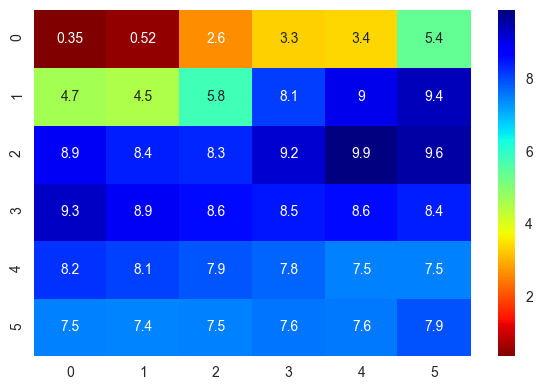

In [121]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)        
sns.heatmap( chi2_ndf , cmap='jet_r', annot=True)
plt.tight_layout()

## muon efficeincy in proton bins

In [5]:
large_bins_Pp_min = np.array([0.3,0.7])
large_bins_Pp_max = np.array([large_bins_Pp_min[1],2])
large_bins_Pp_centers = 0.5*(large_bins_Pp_min+large_bins_Pp_max)
large_bins_Pp_cos_theta_min = np.array([0.,0.75])
large_bins_Pp_cos_theta_max = np.array([large_bins_Pp_cos_theta_min[1],1])
large_bins_Pp_cos_theta_centers = 0.5*(large_bins_Pp_cos_theta_min+large_bins_Pp_cos_theta_max)

In [137]:
Pmu_bins = linspace(0.2,1.3,8); mid_Pmu = 0.5*(Pmu_bins[1:]+Pmu_bins[:-1]); bin_width_Pmu=(mid_Pmu[1]-mid_Pmu[0])
Pmu_cos_theta_bins = linspace(-0.1,1,8); mid_Pmu_cos_theta = 0.5*(Pmu_cos_theta_bins[1:]+Pmu_cos_theta_bins[:-1]); bin_width_Pmu_cos_theta=(mid_Pmu_cos_theta[1]-mid_Pmu_cos_theta[0])

In [133]:
h_mu_eff,h_mu_eff_err = dict(),dict()
h_mu_gen,h_mu_acc = dict(),dict()
heff,heff_err = dict(), dict()
for iPp,(Pp_min,Pp_max) in enumerate(zip(large_bins_Pp_min,large_bins_Pp_max)):
    for iPp_cos_theta,(Pp_cos_theta_min,Pp_cos_theta_max) in enumerate(zip(large_bins_Pp_cos_theta_min,large_bins_Pp_cos_theta_max)):
        key = 'iPp %d iPp_cos_theta %d'%(iPp,iPp_cos_theta)

        genie_CC1p_proton_bin = sample_in_proton_bin(genie_CC1p,Pp_min,Pp_max,Pp_cos_theta_min,Pp_cos_theta_max)
        gen_proton_bin = sample_in_limits(sam=genie_CC1p_proton_bin
                                 ,varPmu='truth_Pmu',varPmu_cos_theta='truth_Pmu_cos_theta'                                 
                                 ,varPp='truth_Pp',varPp_cos_theta='truth_Pp_cos_theta')
        gen_proton_bin = gen_proton_bin[gen_proton_bin['truth_Pmu_cos_theta']<Bins['cos(theta(mu))'][-2]]
        
        selected_CC1p_proton_bin = sample_in_proton_bin(selected_CC1p,Pp_min,Pp_max,Pp_cos_theta_min,Pp_cos_theta_max)
        sel_proton_bin = sample_in_limits(sam=selected_CC1p_proton_bin
                                 ,varPmu='truth_Pmu',varPmu_cos_theta='truth_Pmu_cos_theta'                                 
                                 ,varPp='truth_Pp',varPp_cos_theta='truth_Pp_cos_theta')
        sel_proton_bin = sel_proton_bin[sel_proton_bin['truth_Pmu_cos_theta']<Bins['cos(theta(mu))'][-2]]

        effCC1p_proton_bin = float(len(sel_proton_bin))/len(gen_proton_bin)


#         genie_CC1p_proton_bin = sample_in_proton_bin(genie_CC1p,Pp_min,Pp_max,Pp_cos_theta_min,Pp_cos_theta_max)
#         selected_CC1p_proton_bin = sample_in_proton_bin(selected_CC1p,Pp_min,Pp_max,Pp_cos_theta_min,Pp_cos_theta_max)
#         print len(genie_CC1p_proton_bin),'gen. events in bin, ',len(selected_CC1p_proton_bin),'reco. events in bin'
#         effCC1p_proton_bin = float(len(selected_CC1p_proton_bin))/len(genie_CC1p_proton_bin)

        heff[key],heff_err[key] = [],[]
        h_mu_gen[key],h_mu_acc[key] = [],[]        
        for iPmu in range(len(Pmu_bins)-1):
            Pmu_min,Pmu_max = Pmu_bins[iPmu],Pmu_bins[iPmu+1]    
            # efficiency
            gen_muon_bin = sample_in_muon_bin(gen_proton_bin,Pmu_min,Pmu_max,-1,1)            
            acc_muon_bin = sample_in_muon_bin(sel_proton_bin,Pmu_min,Pmu_max,-1,1)
            Ngen = float(len(gen_muon_bin))
            Nacc = float(len(acc_muon_bin))
            h_mu_gen[key].append( Ngen )
            h_mu_acc[key].append( Nacc )
            heff[key].append( Nacc/Ngen if Ngen>0 else 0 )
            heff_err[key].append( heff[key][-1]*np.sqrt( (1./Nacc if Nacc>0 else 0) 
                                                    + (1./Ngen if Ngen>0 else 0)) )        
        heff[key] = np.array(heff[key]) * 1./effCC1p_proton_bin;
        heff_err[key] = np.array(heff_err[key]) * 1./effCC1p_proton_bin;

#         print heff[key]
print 'done.'

done.


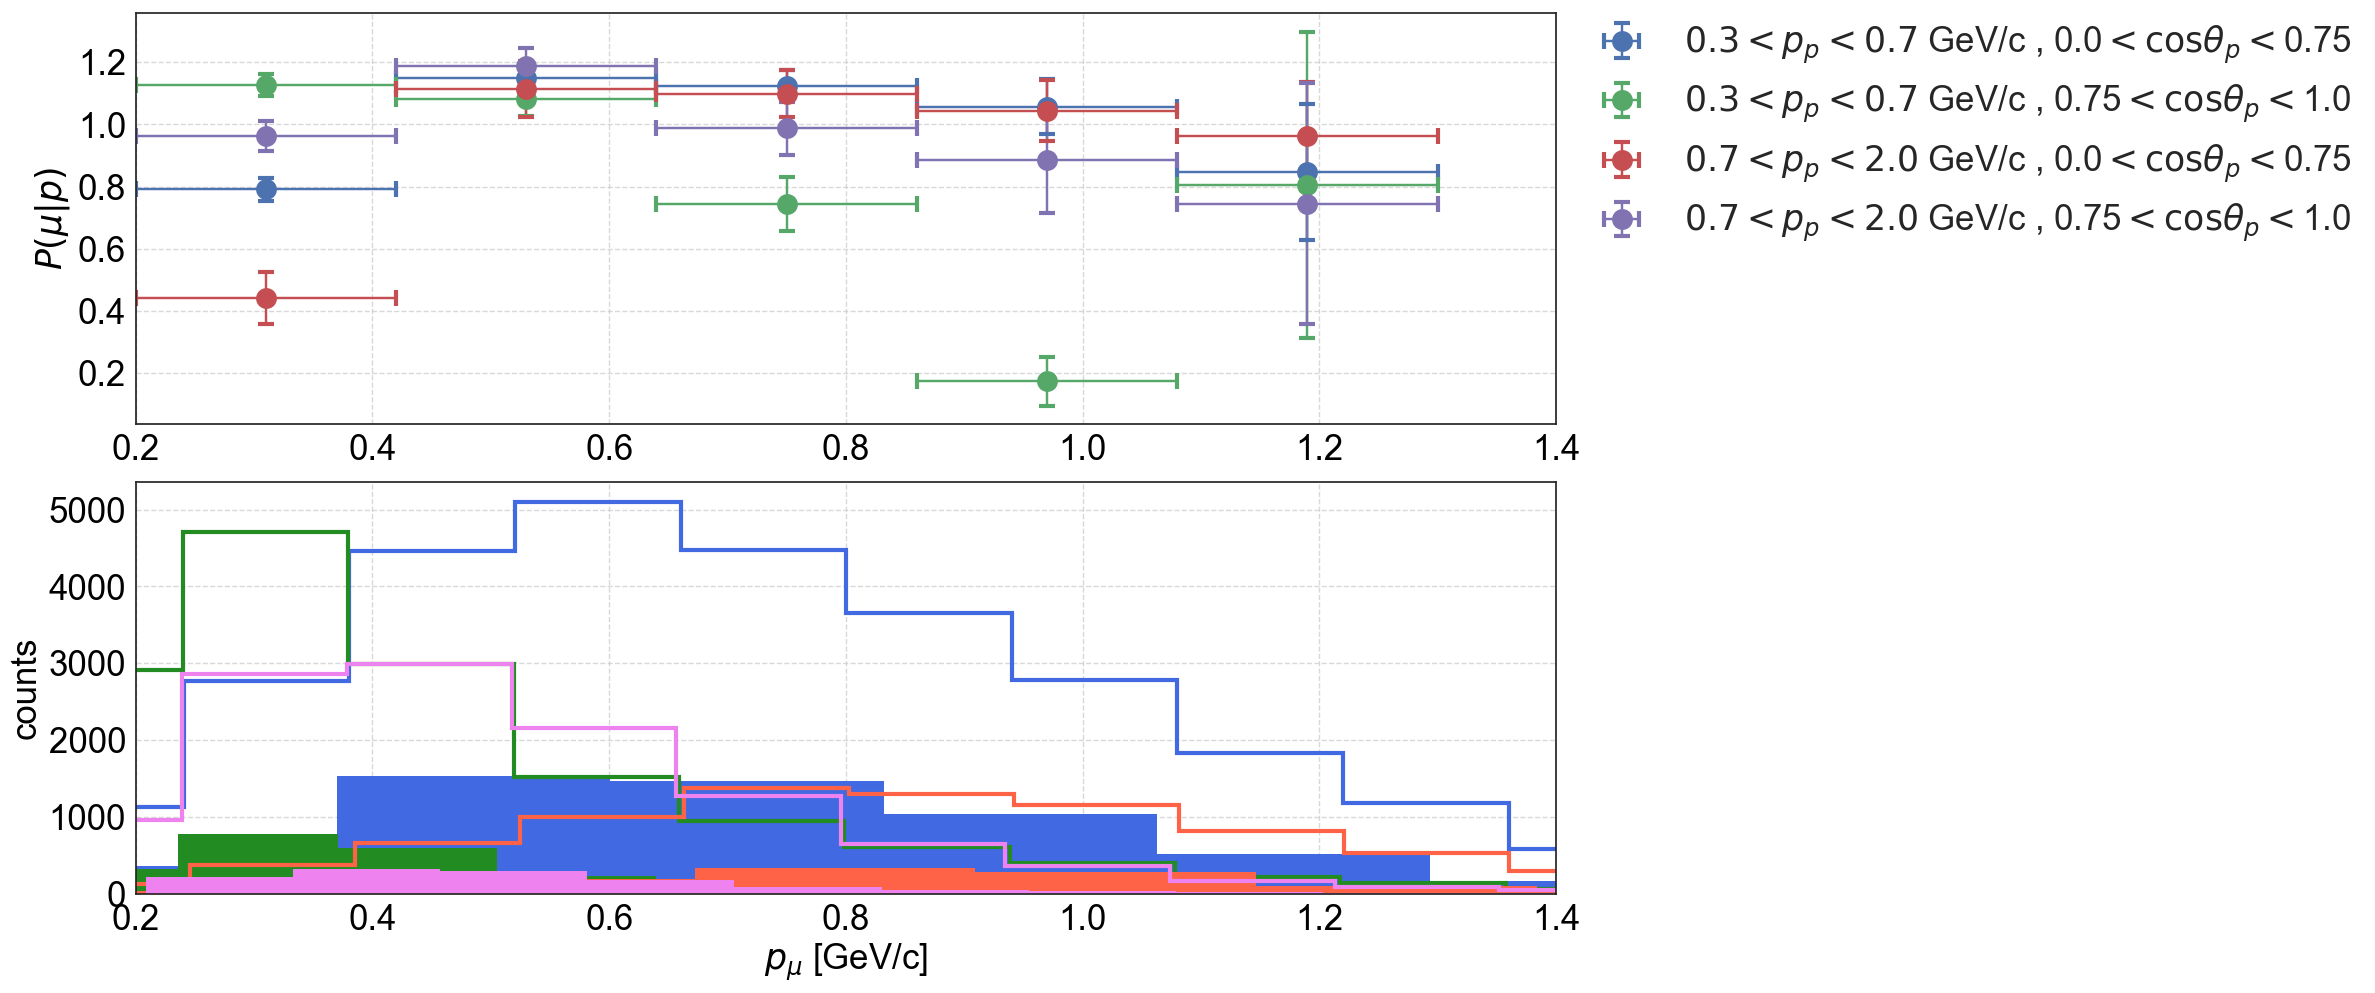

In [134]:
fig=plt.figure(figsize=(16,10))
ax = fig.add_subplot(2,1,1)
for iPp,(Pp_min,Pp_max) in enumerate(zip(large_bins_Pp_min,large_bins_Pp_max)):
    for iPp_cos_theta,(Pp_cos_theta_min,Pp_cos_theta_max) in enumerate(zip(large_bins_Pp_cos_theta_min,large_bins_Pp_cos_theta_max)):
        key = 'iPp %d iPp_cos_theta %d'%(iPp,iPp_cos_theta)
        ax.errorbar(x=mid_Pmu,xerr=0.5*bin_width_Pmu,y=heff[key],yerr=heff_err[key]
                    ,fmt='o',markersize=15,capsize=6,capthick=3
                    ,label=r'$%.1f<p_p<%.1f$ GeV/c , %s$<\cos\theta_p<$%s'%(Pp_min,Pp_max,Pp_cos_theta_min,Pp_cos_theta_max))        
set_axes(ax,'',r'$P( \mu  | p)$',do_add_grid=True,xlim=(0.2,1.4))
ax.legend(bbox_to_anchor=(1,1.05),loc=2,fontsize=25)

colors = ['royalblue','forestgreen','tomato','violet']
i_c=0
ax = fig.add_subplot(2,1,2)
for iPp,(Pp_min,Pp_max) in enumerate(zip(large_bins_Pp_min,large_bins_Pp_max)):
    for iPp_cos_theta,(Pp_cos_theta_min,Pp_cos_theta_max) in enumerate(zip(large_bins_Pp_cos_theta_min,large_bins_Pp_cos_theta_max)):
        color = colors[i_c]; i_c = i_c + 1 ; 
        genie_CC1p_proton_bin = sample_in_proton_bin(genie_CC1p,Pp_min,Pp_max,Pp_cos_theta_min,Pp_cos_theta_max)
        plt.hist(genie_CC1p_proton_bin['truth_Pmu'],histtype='step',linewidth=3,color=color)
        
        selected_CC1p_proton_bin = sample_in_proton_bin(selected_CC1p,Pp_min,Pp_max,Pp_cos_theta_min,Pp_cos_theta_max)
        plt.hist(selected_CC1p_proton_bin['truth_Pmu'],histtype='stepfilled',linewidth=3,color=color)

set_axes(ax,r'$p_\mu$ [GeV/c]',r'counts',do_add_grid=True,xlim=(0.2,1.4))
ax.legend(bbox_to_anchor=(1,1.05),loc=2,fontsize=25)

plt.tight_layout()

done.


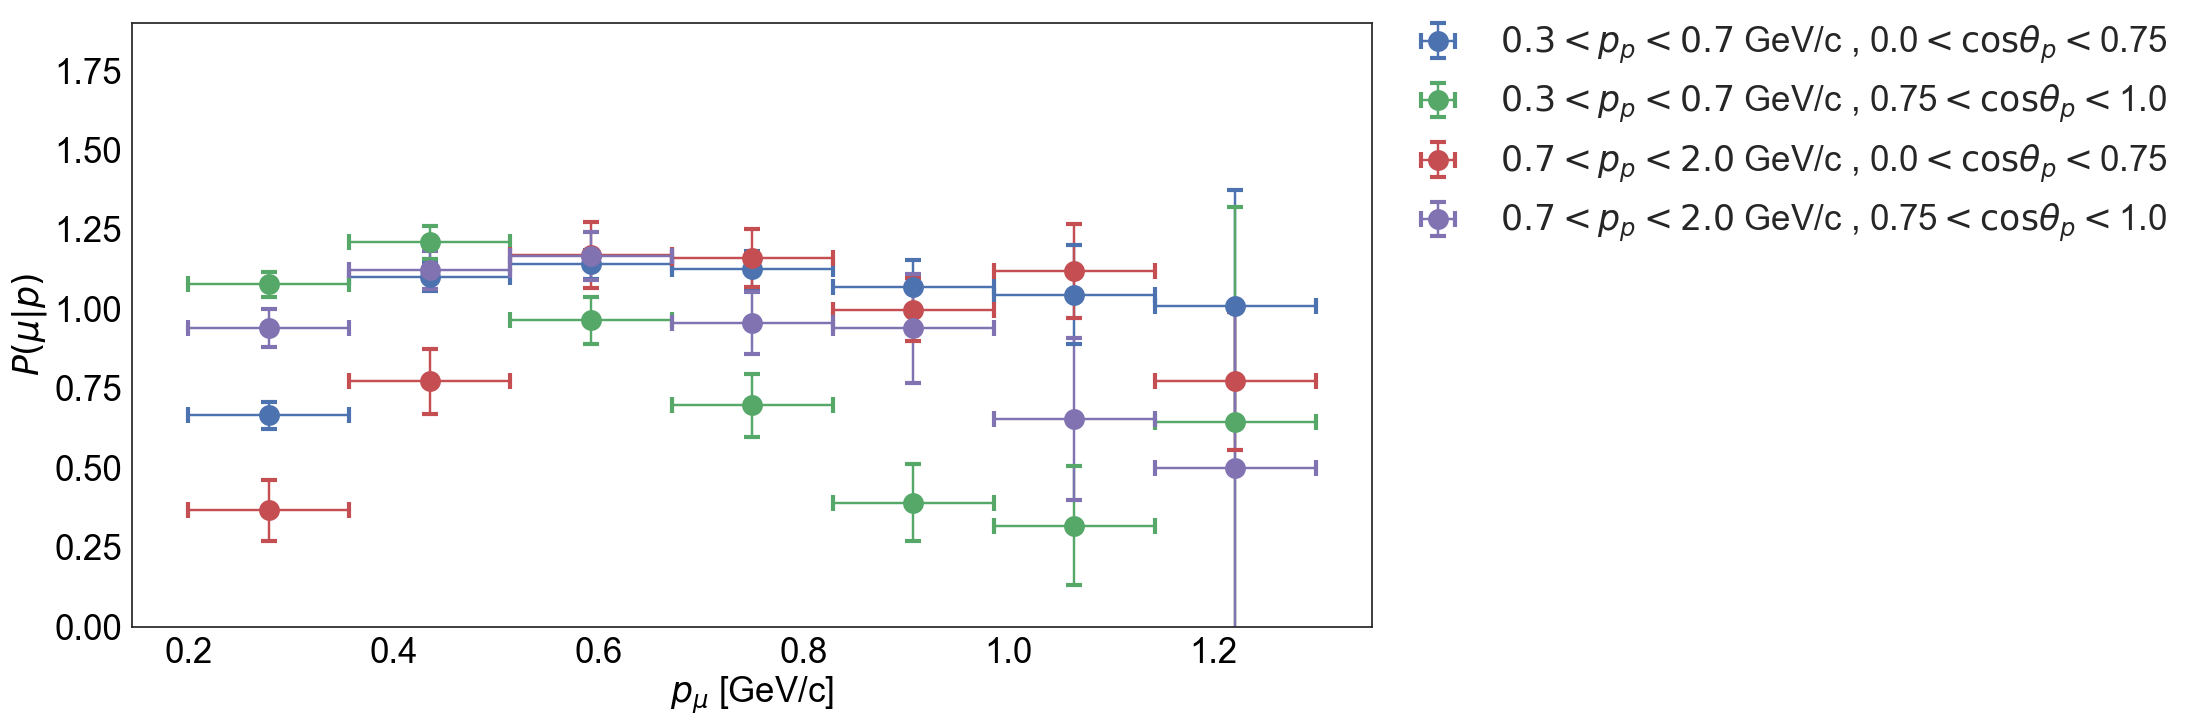

In [142]:
h_mu_eff,h_mu_eff_err = dict(),dict()
h_mu_gen,h_mu_acc = dict(),dict()
heff,heff_err = dict(), dict()
for iPp,(Pp_min,Pp_max) in enumerate(zip(large_bins_Pp_min,large_bins_Pp_max)):
    for iPp_cos_theta,(Pp_cos_theta_min,Pp_cos_theta_max) in enumerate(zip(large_bins_Pp_cos_theta_min,large_bins_Pp_cos_theta_max)):
        key = 'iPp %d iPp_cos_theta %d'%(iPp,iPp_cos_theta)

        genie_CC1p_proton_bin = sample_in_proton_bin(genie_CC1p,Pp_min,Pp_max,Pp_cos_theta_min,Pp_cos_theta_max)
        gen_proton_bin = sample_in_limits(sam=genie_CC1p_proton_bin
                                 ,varPmu='truth_Pmu',varPmu_cos_theta='truth_Pmu_cos_theta'                                 
                                 ,varPp='truth_Pp',varPp_cos_theta='truth_Pp_cos_theta')
        gen_proton_bin = gen_proton_bin[gen_proton_bin['truth_Pmu_cos_theta']<Bins['cos(theta(mu))'][-2]]
        
        selected_CC1p_proton_bin = sample_in_proton_bin(selected_CC1p,Pp_min,Pp_max,Pp_cos_theta_min,Pp_cos_theta_max)
        sel_proton_bin = sample_in_limits(sam=selected_CC1p_proton_bin
                                 ,varPmu='truth_Pmu',varPmu_cos_theta='truth_Pmu_cos_theta'                                 
                                 ,varPp='truth_Pp',varPp_cos_theta='truth_Pp_cos_theta')
        sel_proton_bin = sel_proton_bin[sel_proton_bin['truth_Pmu_cos_theta']<Bins['cos(theta(mu))'][-2]]

        effCC1p_proton_bin = float(len(sel_proton_bin))/len(gen_proton_bin)



        heff[key],heff_err[key] = [],[]
        h_mu_gen[key],h_mu_acc[key] = [],[]        
        for iPmu in range(len(Pmu_bins)-1):
            Pmu_min,Pmu_max = Pmu_bins[iPmu],Pmu_bins[iPmu+1]    
            # efficiency
            gen_muon_bin = sample_in_muon_bin(gen_proton_bin,Pmu_min,Pmu_max,-1,1)            
            acc_muon_bin = sample_in_muon_bin(sel_proton_bin,Pmu_min,Pmu_max,-1,1)
            Ngen = float(len(gen_muon_bin))
            Nacc = float(len(acc_muon_bin))
            h_mu_gen[key].append( Ngen )
            h_mu_acc[key].append( Nacc )
            heff[key].append( Nacc/Ngen if Ngen>0 else 0 )
            heff_err[key].append( heff[key][-1]*np.sqrt( (1./Nacc if Nacc>0 else 0) 
                                                    + (1./Ngen if Ngen>0 else 0)) )        
        heff[key] = np.array(heff[key]) * 1./effCC1p_proton_bin;
        heff_err[key] = np.array(heff_err[key]) * 1./effCC1p_proton_bin;

#         print heff[key]
print 'done.'
fig,ax=plt.subplots(figsize=(16,8))
for iPp,(Pp_min,Pp_max) in enumerate(zip(large_bins_Pp_min,large_bins_Pp_max)):
    for iPp_cos_theta,(Pp_cos_theta_min,Pp_cos_theta_max) in enumerate(zip(large_bins_Pp_cos_theta_min,large_bins_Pp_cos_theta_max)):
        key = 'iPp %d iPp_cos_theta %d'%(iPp,iPp_cos_theta)
        ax.errorbar(x=mid_Pmu,xerr=0.5*bin_width_Pmu,y=heff[key],yerr=heff_err[key]
                    ,fmt='o',markersize=15,capsize=6,capthick=3
                    ,label=r'$%.1f<p_p<%.1f$ GeV/c , %s$<\cos\theta_p<$%s'%(Pp_min,Pp_max,Pp_cos_theta_min,Pp_cos_theta_max))        
set_axes(ax,r'$p_\mu$ [GeV/c]',r'$P( \mu  | p)$'
         ,ylim=(0,1.9)
        )
ax.legend(bbox_to_anchor=(1,1.05),loc=2,fontsize=25)
plt.savefig(figures_path+'Pmu_efficiency_in_proton_bins.pdf',bbox_inches='tight')

done.


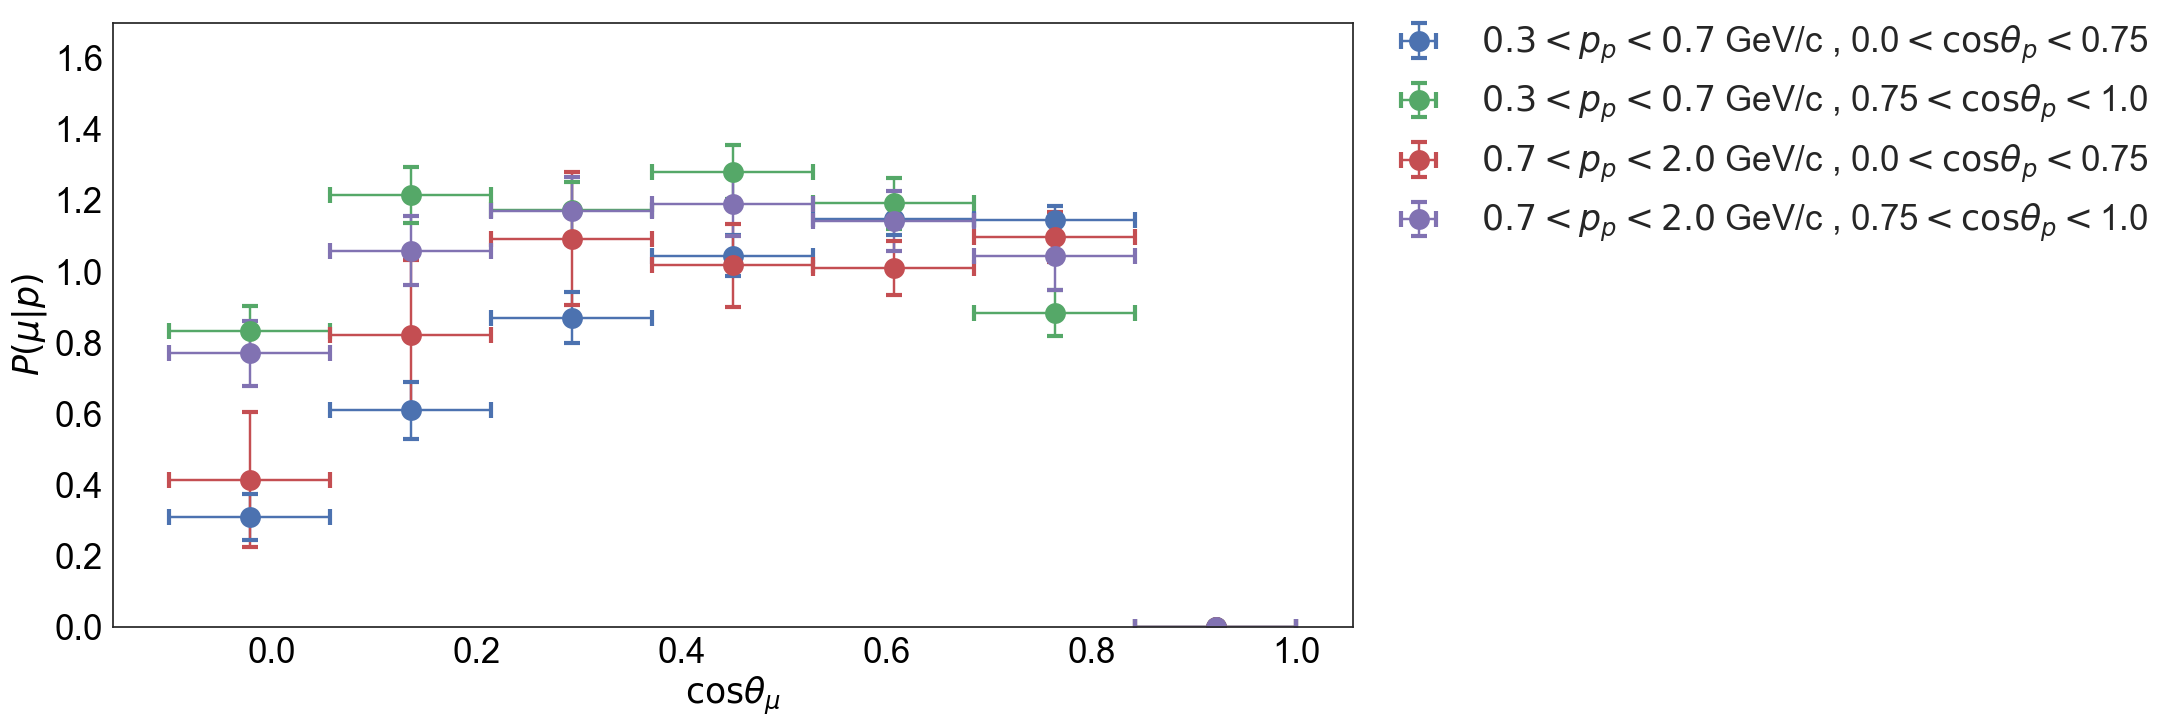

In [139]:
h_mu_eff,h_mu_eff_err = dict(),dict()
h_mu_gen,h_mu_acc = dict(),dict()
heff,heff_err = dict(), dict()
for iPp,(Pp_min,Pp_max) in enumerate(zip(large_bins_Pp_min,large_bins_Pp_max)):
    for iPp_cos_theta,(Pp_cos_theta_min,Pp_cos_theta_max) in enumerate(zip(large_bins_Pp_cos_theta_min,large_bins_Pp_cos_theta_max)):
        key = 'iPp %d iPp_cos_theta %d'%(iPp,iPp_cos_theta)

        genie_CC1p_proton_bin = sample_in_proton_bin(genie_CC1p,Pp_min,Pp_max,Pp_cos_theta_min,Pp_cos_theta_max)
        gen_proton_bin = sample_in_limits(sam=genie_CC1p_proton_bin
                                 ,varPmu='truth_Pmu',varPmu_cos_theta='truth_Pmu_cos_theta'                                 
                                 ,varPp='truth_Pp',varPp_cos_theta='truth_Pp_cos_theta')
        gen_proton_bin = gen_proton_bin[gen_proton_bin['truth_Pmu_cos_theta']<Bins['cos(theta(mu))'][-2]]
        
        selected_CC1p_proton_bin = sample_in_proton_bin(selected_CC1p,Pp_min,Pp_max,Pp_cos_theta_min,Pp_cos_theta_max)
        sel_proton_bin = sample_in_limits(sam=selected_CC1p_proton_bin
                                 ,varPmu='truth_Pmu',varPmu_cos_theta='truth_Pmu_cos_theta'                                 
                                 ,varPp='truth_Pp',varPp_cos_theta='truth_Pp_cos_theta')
        sel_proton_bin = sel_proton_bin[sel_proton_bin['truth_Pmu_cos_theta']<Bins['cos(theta(mu))'][-2]]

        effCC1p_proton_bin = float(len(sel_proton_bin))/len(gen_proton_bin)


        heff[key],heff_err[key] = [],[]
        h_mu_gen[key],h_mu_acc[key] = [],[]
        for iPmu_cos_theta in range(len(Pmu_cos_theta_bins)-1):
            Pmu_cos_theta_min,Pmu_cos_theta_max = Pmu_cos_theta_bins[iPmu_cos_theta],Pmu_cos_theta_bins[iPmu_cos_theta+1]    
            # efficiency
            gen_muon_bin = sample_in_muon_bin(gen_proton_bin,0,2,Pmu_cos_theta_min,Pmu_cos_theta_max)            
            acc_muon_bin = sample_in_muon_bin(sel_proton_bin,0,2,Pmu_cos_theta_min,Pmu_cos_theta_max)
            Ngen = float(len(gen_muon_bin))
            Nacc = float(len(acc_muon_bin))
            h_mu_gen[key].append( Ngen )
            h_mu_acc[key].append( Nacc )
            heff[key].append( (1./effCC1p_proton_bin)*Nacc/Ngen if Ngen>0 else 0 )
            heff_err[key].append( heff[key][-1]*np.sqrt( (1./Nacc if Nacc>0 else 0) 
                                                    + (1./Ngen if Ngen>0 else 0)) )        
#         print heff[key]
print 'done.'
fig,ax=plt.subplots(figsize=(16,8))
for iPp,(Pp_min,Pp_max) in enumerate(zip(large_bins_Pp_min,large_bins_Pp_max)):
    for iPp_cos_theta,(Pp_cos_theta_min,Pp_cos_theta_max) in enumerate(zip(large_bins_Pp_cos_theta_min,large_bins_Pp_cos_theta_max)):
        key = 'iPp %d iPp_cos_theta %d'%(iPp,iPp_cos_theta)
        ax.errorbar(x=mid_Pmu_cos_theta,xerr=0.5*bin_width_Pmu_cos_theta,y=heff[key],yerr=heff_err[key]
                    ,fmt='o',markersize=15,capsize=6,capthick=3
                    ,label=r'$%.1f<p_p<%.1f$ GeV/c , %s$<\cos\theta_p<$%s'%(Pp_min,Pp_max,Pp_cos_theta_min,Pp_cos_theta_max))        
set_axes(ax,r'$\cos\theta_\mu$',r'$P( \mu  | p)$',ylim=(0,1.7))
ax.legend(bbox_to_anchor=(1,1.05),loc=2,fontsize=25)
plt.savefig(figures_path+'Pmu_cos_theta_efficiency_in_proton_bins.pdf',bbox_inches='tight')